In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor 

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

### Import Data¶

In [2]:
df=pd.read_csv("advertising.csv")

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.corr(numeric_only=True)

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [8]:
abs(df.corr(numeric_only=True)['Sales']).sort_values(ascending=False)

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

### Data Visualization¶

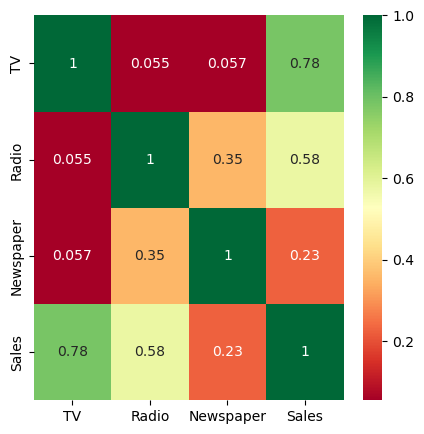

In [9]:
ax = plt.subplots(figsize = (5,5))
sns.heatmap(df.corr(numeric_only=True),annot = True,cmap='RdYlGn');

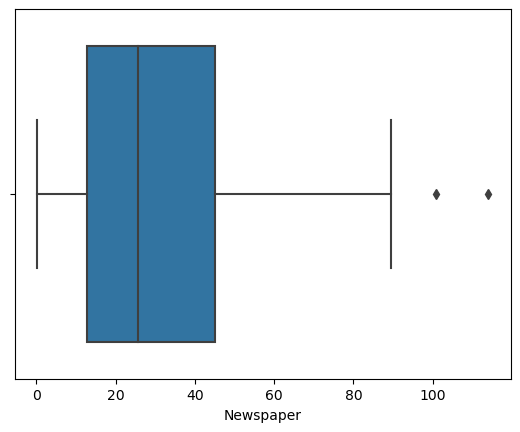

In [10]:
sns.boxplot(x=df['Newspaper']);

### Feature Engineering

In [11]:
outliers = df.quantile(q=.97, numeric_only=True)

In [12]:
df = df[(df['Newspaper']<outliers['Newspaper'])]

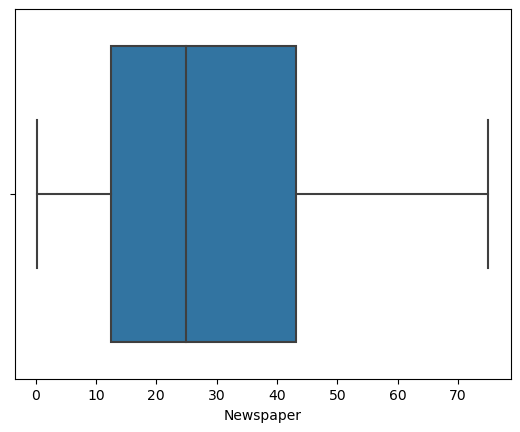

In [13]:
sns.boxplot(x=df['Newspaper']);

In [14]:
abs(df.corr(numeric_only=True)['Sales'].sort_values(ascending=False))

Sales        1.000000
TV           0.783089
Radio        0.586535
Newspaper    0.242819
Name: Sales, dtype: float64

### Modeling

In [15]:
x = df.drop('Sales', axis=1)
y = df[['Sales']]

In [16]:
x=pd.get_dummies(x,drop_first=True)

In [17]:
def regression_funct(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor',
                'GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [18]:
regression_funct(x,y)

,R_Squared,RMSE,MAE
GradientBoostingRegressor,0.984359,0.668024,0.536722
ExtraTreeRegressor,0.961392,1.049542,0.820513
KNeighborsRegressor,0.929284,1.420437,0.949744
LinearRegression,0.899526,1.693127,1.267680
Ridge,0.899522,1.693161,1.267706
ElasticNet,0.897725,1.708236,1.277979
Lasso,0.896491,1.718508,1.284320


In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)

In [20]:
lr = LinearRegression()
regmodel = lr.fit(x_train,y_train)

In [21]:
y_pretest = regmodel.predict(x_test)

In [22]:
(mean_squared_error(y_test,y_pretest))**0.5

1.6931269371410191

In [23]:
r2_score(y_test,y_pretest)

0.899526357495891

### Feature Importance


In [24]:
feature_importence=pd.DataFrame({'Feature': x_train.columns, 'Coefs':lr.coef_[0]})

In [25]:
feature_importence=feature_importence.sort_values(by='Coefs', ascending=False)

In [26]:
feature_importence

,Feature,Coefs
1,Radio,0.176483
0,TV,0.045640
2,Newspaper,0.005115


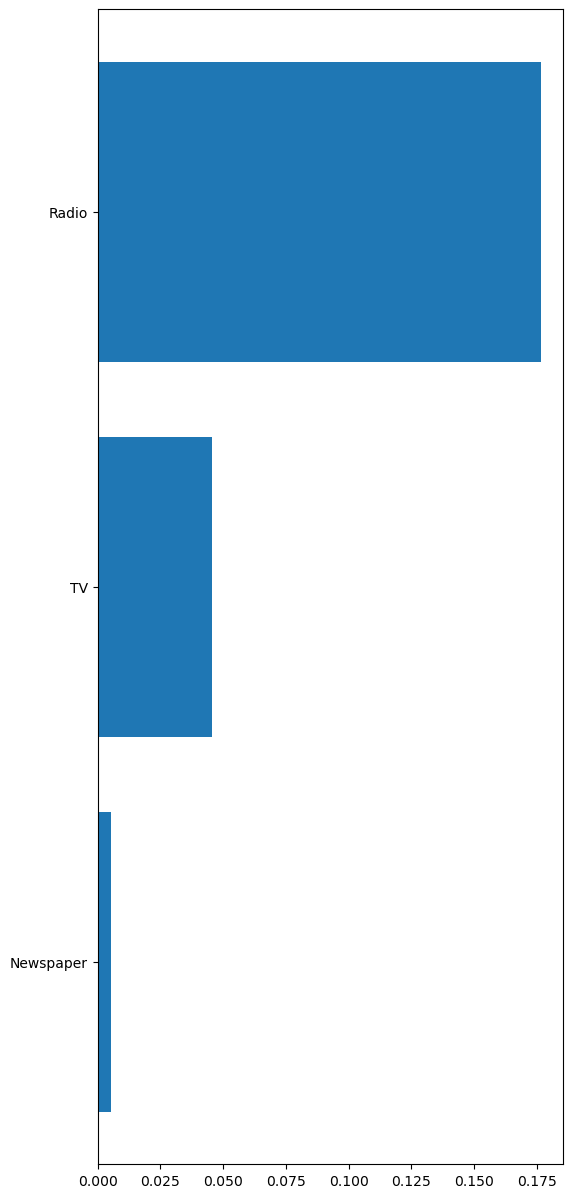

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,15))
plt.barh(feature_importence['Feature'],feature_importence['Coefs'])
plt.gca().invert_yaxis()

In [28]:
# What you need to know about success rates in regression
# R2 score >0.85
# Twilight RMSE
# Residuals should follow a normal distribution

In [29]:
residuals = y_test - y_pretest

In [30]:
residuals

,Sales
143,1.320594
17,1.159149
160,0.052154
98,1.327360
69,1.394925
158,-3.100947
56,-3.127640
15,1.669531
115,-0.397585
114,-0.528477


<Axes: ylabel='Count'>

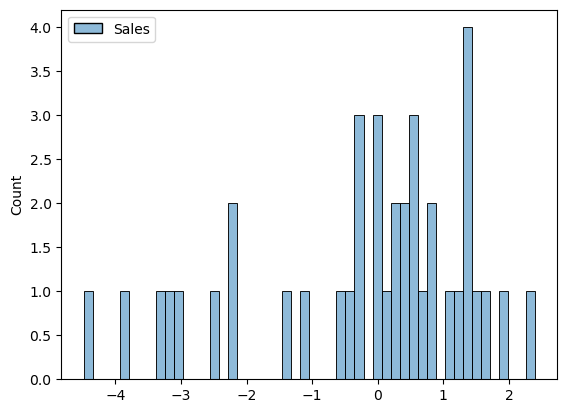

In [31]:
sns.histplot(residuals, bins=50)